In [1]:
pip install igraph

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# use this code in the anaconda prompt, not in jupyter notebook
#conda install -c conda-forge python-annoy
#pip install bbknn

^C


In [2]:
pip install gseapy

     |████████████████████████████████| 1.5 MB 1.7 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 964 kB 3.4 MB/s eta 0:00:01
  Using cached grequests-0.6.0-py3-none-any.whl (5.2 kB)
     |████████████████████████████████| 47 kB 5.2 MB/s eta 0:00:01
  Using cached easydev-0.12.0-py3-none-any.whl
     |████████████████████████████████| 4.6 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 144 kB 4.9 MB/s eta 0:00:01
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached gevent-21.12.0-cp38-cp38-macosx_10_14_x86_64.whl (1.9 MB)
  Using cached zope.interface-5.4.0-cp38-cp38-macosx_10_14_x86_64.whl (208 kB)
     |████████████████████████████████| 93 kB 2.1 MB/s eta 0:00:011
  Using cached zope.event-4.5.0-py2.py3-none-any.whl (6.8 kB)
  Using cached url_normalize-1.4.3-py2.py3-none-any.whl (6.8 kB)
  ERROR: Command errored 

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install decoupler

                                              0.0/76.4 kB ? eta -:--:--
     -----                                    10.2/76.4 kB ? eta -:--:--
     -----------------------------------    71.7/76.4 kB 787.7 kB/s eta 0:00:01
     -------------------------------------- 76.4/76.4 kB 529.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import bbknn

In [2]:
import pandas as pd
import scanpy as sc
import numpy as np
from numpy import linalg as la
from scipy.sparse import issparse
import loompy
import anndata
import scvelo as scv
scv.logging.print_version()

Running scvelo 0.2.5 (python 3.8.16) on 2023-05-02 12:09.


In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80,dpi_save=300, facecolor='white')

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.5 python-igraph==0.10.4 louvain==0.8.0 pynndescent==0.5.5


In [4]:
import scanpy.external as sce

In [5]:
import decoupler as dc

In [6]:
import os
os.chdir('F:/Ko/PD-1_responders')

In [37]:
import seaborn as sns
sns.set_style('whitegrid')

In [7]:
#sc.pl.umap(adata, color=['patient'], save='umap_Group_A_patient_immune.pdf')

In [8]:
#adata_1.write('Integrated_all_cell_from_69P_and_responders_and_Nonresponders_after_harmony.h5ad', compression='gzip')

In [9]:
adata_1 = sc.read('Integrated_all_cell_from_69P_and_responders_and_Nonresponders_after_harmony.h5ad')

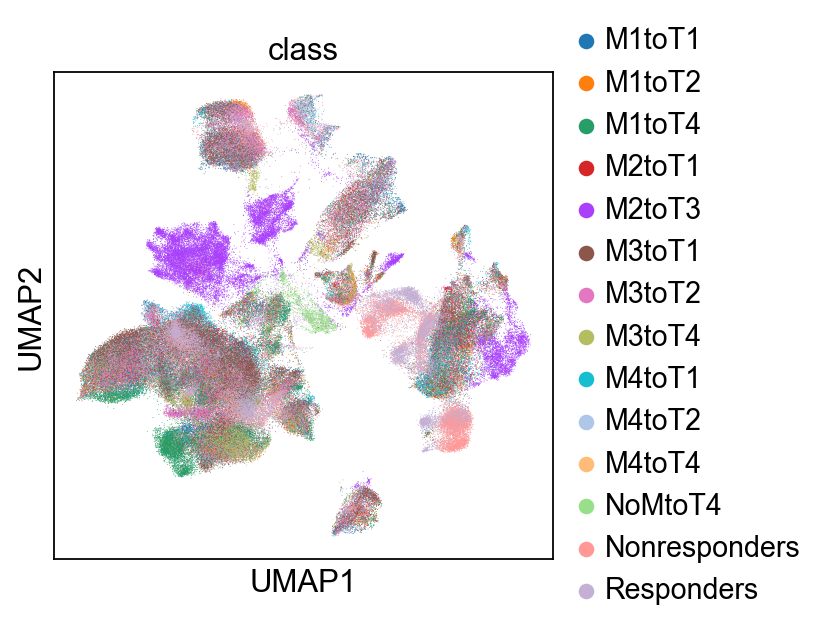

In [10]:
sc.pl.umap(adata_1, color=['class'])

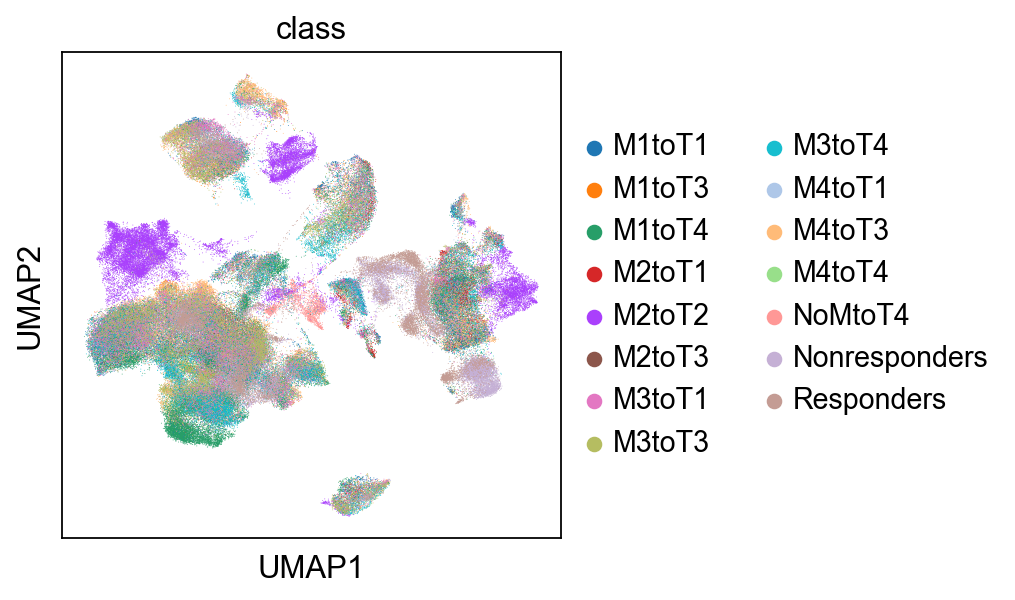

In [77]:
# previous result
#sc.pl.umap(adata_1, color=['class'])

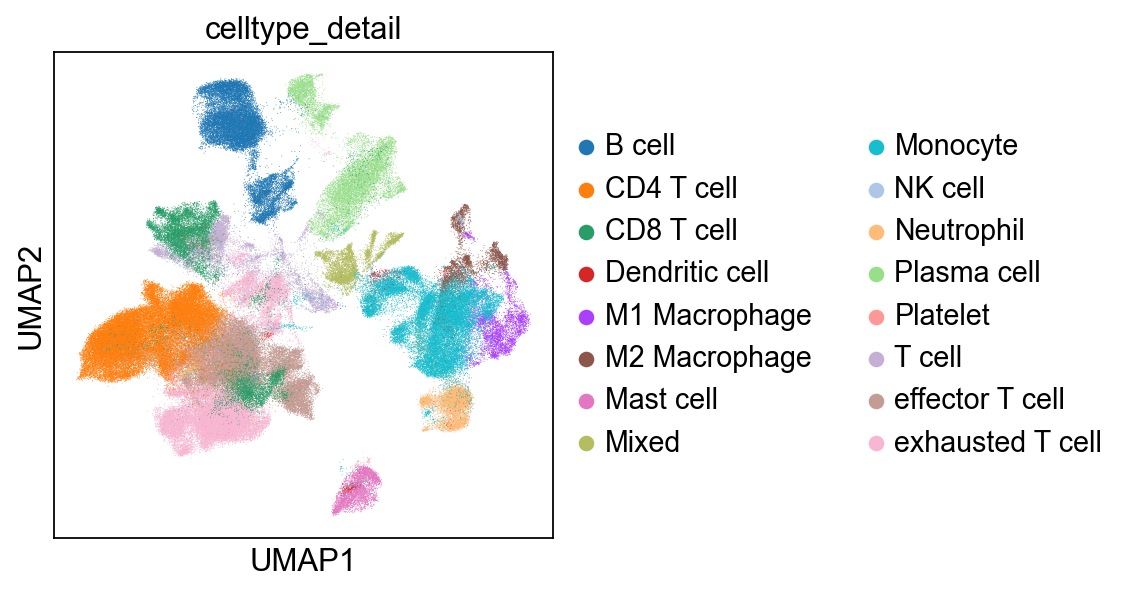

In [36]:
sc.pl.umap(adata_1, color=['celltype_detail'])

In [11]:
adata_1.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,tissue,patient,leiden,batch,total_counts_ribo,...,crude,celltype_detail,patient_cluster,dataset,T_patient_cluster,T_patient_cluster4,Myeloid_patient_cluster4,class,file_name,response
AAACCTGAGTAGCCGA-1-0-0-0,3934.0,3879,1452.073242,18.802568,1.294877,tumor,P686,4,0,198.197769,...,T cell,CD8 T cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2,M2toT3,NaN,NaN
AAACCTGCAAGAGGCT-1-0-0-0,674.0,669,882.995728,11.229170,1.271713,tumor,P686,4,0,213.666718,...,T cell,CD8 T cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2,M2toT3,NaN,NaN
AAACCTGCAGTATCTG-1-0-0-0,1014.0,1003,956.411804,18.788149,1.964441,tumor,P686,4,0,221.148575,...,T cell,CD8 T cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2,M2toT3,NaN,NaN
AAACCTGCATGCCTTC-1-0-0-0,2607.0,2556,1262.646240,23.060396,1.826355,tumor,P686,13,0,161.333832,...,Myeloid cell,M1 Macrophage,Group A,Dinh dataset,NaN,T_3,Myeloid_2,M2toT3,NaN,NaN
AAACCTGGTGCCTGGT-1-0-0-0,896.0,885,1091.559448,17.238060,1.579214,tumor,P686,4,0,176.360626,...,T cell,CD8 T cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2,M2toT3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AAAGCTGCGCGC-5-1,608.0,593,2097.263916,75.106140,3.581149,NaN,responder_3,5,1,265.869873,...,NaN,B cell,NaN,NaN,NaN,NaN,NaN,Responders,PD1-S3,Responders
GCTCACGGCAGG-5-1,560.0,541,2078.378662,57.489052,2.766053,NaN,responder_3,12,1,346.141968,...,NaN,CD8 T cell,NaN,NaN,NaN,NaN,NaN,Responders,PD1-S3,Responders
GTAAATTAGCCA-5-1,609.0,599,2114.809326,59.998657,2.837072,NaN,responder_3,9,1,156.074402,...,NaN,Monocyte,NaN,NaN,NaN,NaN,NaN,Responders,PD1-S3,Responders
TCCCCCGTAAAA-5-1,581.0,575,2124.718262,27.837864,1.310191,NaN,responder_3,9,1,177.390732,...,NaN,Monocyte,NaN,NaN,NaN,NaN,NaN,Responders,PD1-S3,Responders


In [12]:
adata_1.to_df()

,LINC01128,LINC00115,NOC2L,PLEKHN1,HES4,ISG15,C1orf159,TNFRSF4,SDF4,B3GALT6,...,MPP1,F8,F8A1,FUNDC2,BRCC3,VBP1,RAB39B,CLIC2,TMLHE,VAMP7
AAACCTGAGTAGCCGA-1-0-0-0,-0.235053,-0.108449,0.702951,-0.129115,-0.291489,1.516610,-0.130112,0.560010,0.504829,-0.131804,...,0.412862,-0.121792,-0.099843,0.622756,-0.218686,0.073631,-0.209072,-0.166557,-0.183766,-0.322349
AAACCTGCAAGAGGCT-1-0-0-0,-0.104727,-0.053627,-0.206442,-0.080505,-0.175146,0.544755,-0.043193,-0.137692,-0.344947,-0.053495,...,-0.178588,-0.043801,-0.131593,-0.332858,-0.089244,-0.257808,-0.111571,-0.138832,-0.081606,-0.157171
AAACCTGCAGTATCTG-1-0-0-0,-0.137542,-0.069520,-0.239099,-0.082534,-0.163282,0.219140,-0.064172,-0.152380,-0.372930,-0.064195,...,-0.187432,-0.051742,-0.119022,-0.360417,-0.100845,2.022949,-0.117398,-0.140082,-0.093134,-0.167691
AAACCTGCATGCCTTC-1-0-0-0,-0.204181,-0.097096,-0.320742,-0.109618,-0.231755,-0.203141,-0.108813,0.026055,-0.012710,-0.106205,...,0.819339,-0.094174,-0.103787,-0.468132,-0.171614,0.459494,-0.171340,-0.155509,-0.148469,-0.258932
AAACCTGGTGCCTGGT-1-0-0-0,-0.159428,-0.077543,-0.269284,-0.096481,-0.206135,1.155510,-0.079282,-0.227021,-0.468660,-0.082454,...,-0.211661,-0.071465,-0.116283,-0.407178,-0.134474,3.214823,-0.144378,-0.147984,-0.118331,-0.213030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AAAGCTGCGCGC-5-1,-0.180602,-0.157070,-0.200738,-0.151809,-0.297381,-0.787899,-0.119621,-0.170868,-0.389000,-0.158611,...,-0.308221,-0.108354,-0.118618,-0.363729,-0.291946,-0.290021,-0.086301,-0.172803,-0.145862,-0.262825
GCTCACGGCAGG-5-1,-0.162163,-0.158517,-0.183295,-0.141443,-0.311934,-0.809892,-0.108937,-0.154502,-0.395562,-0.161227,...,-0.351866,-0.108016,-0.136416,-0.346762,-0.289343,-0.298755,-0.089392,-0.168805,-0.146780,-0.268514
GTAAATTAGCCA-5-1,-0.169808,-0.163256,-0.189444,-0.147773,-0.318563,2.279302,-0.112906,-0.161015,-0.404272,-0.165030,...,-0.353076,-0.110629,-0.135788,-0.357662,-0.296642,-0.304074,-0.089593,-0.175085,-0.149484,-0.275085
TCCCCCGTAAAA-5-1,-0.143129,-0.172299,-0.162796,-0.135421,-0.356105,3.724981,-0.096847,-0.136981,-0.428649,-0.175180,...,-0.441359,-0.113357,-0.170329,-0.338143,-0.300972,-0.328349,-0.095995,-0.175318,-0.154829,-0.294941


In [13]:
adata_1.X

array([[-0.23505302, -0.10844932,  0.7029514 , ..., -0.16655655,
        -0.18376628, -0.32234856],
       [-0.10472715, -0.05362665, -0.20644231, ..., -0.13883202,
        -0.08160612, -0.15717056],
       [-0.13754229, -0.06952015, -0.23909941, ..., -0.1400819 ,
        -0.0931339 , -0.1676912 ],
       ...,
       [-0.16980839, -0.16325605, -0.18944423, ..., -0.17508492,
        -0.14948405, -0.27508488],
       [-0.14312935, -0.17229916, -0.16279607, ..., -0.1753178 ,
        -0.15482885, -0.29494086],
       [-0.17400947, -0.15992488, -0.19402716, ..., -0.17339706,
        -0.14754054, -0.2687684 ]], dtype=float32)

In [14]:
# unlog the counts
adata_1.X1 = np.exp2(adata_1.X)

In [15]:
adata_1.X1 

array([[0.84965384, 0.9275846 , 1.6278315 , ..., 0.8909667 , 0.8804017 ,
        0.79976684],
       [0.9299808 , 0.96351117, 0.8666718 , ..., 0.90825415, 0.945005  ,
        0.89678216],
       [0.90906644, 0.95295495, 0.8472741 , ..., 0.9074677 , 0.93748415,
        0.89026624],
       ...,
       [0.8889608 , 0.8930073 , 0.8769435 , ..., 0.88571537, 0.9015728 ,
        0.82640177],
       [0.9055528 , 0.88742733, 0.8932921 , ..., 0.88557243, 0.8982389 ,
        0.81510574],
       [0.88637584, 0.8950717 , 0.8741622 , ..., 0.88675225, 0.90278816,
        0.8300278 ]], dtype=float32)

In [16]:
adata_1.X = adata_1.X1

In [17]:
# Store raw counts in layers
adata_1.layers['counts'] = adata_1.X

In [18]:
adata_1.to_df()

,LINC01128,LINC00115,NOC2L,PLEKHN1,HES4,ISG15,C1orf159,TNFRSF4,SDF4,B3GALT6,...,MPP1,F8,F8A1,FUNDC2,BRCC3,VBP1,RAB39B,CLIC2,TMLHE,VAMP7
AAACCTGAGTAGCCGA-1-0-0-0,0.849654,0.927585,1.627831,0.914392,0.817058,2.861180,0.913760,1.474280,1.418956,0.912689,...,1.331324,0.919045,0.933135,1.539814,0.859347,1.052362,0.865093,0.890967,0.880402,0.799767
AAACCTGCAAGAGGCT-1-0-0-0,0.929981,0.963511,0.866672,0.945727,0.885678,1.458772,0.970505,0.908972,0.787337,0.963599,...,0.883567,0.970096,0.912823,0.793962,0.940015,0.836357,0.925579,0.908254,0.945005,0.896782
AAACCTGCAGTATCTG-1-0-0-0,0.909066,0.952955,0.847274,0.944398,0.892991,1.164039,0.956494,0.899765,0.772213,0.956479,...,0.878167,0.964771,0.920811,0.778939,0.932486,4.064137,0.921849,0.907468,0.937484,0.890266
AAACCTGCATGCCTTC-1-0-0-0,0.868031,0.934913,0.800658,0.926834,0.851598,0.868657,0.927350,1.018224,0.991228,0.929029,...,1.764597,0.936809,0.930587,0.722900,0.887849,1.375059,0.888018,0.897816,0.902207,0.835706
AAACCTGGTGCCTGGT-1-0-0-0,0.895380,0.947670,0.829731,0.935312,0.866856,2.227631,0.946529,0.854397,0.722635,0.944450,...,0.863542,0.951671,0.922562,0.754097,0.911002,9.284492,0.904769,0.902511,0.921253,0.862723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AAAGCTGCGCGC-5-1,0.882335,0.896844,0.870105,0.900121,0.813728,0.579187,0.920430,0.888308,0.763659,0.895887,...,0.807637,0.927646,0.921070,0.777153,0.816800,0.817890,0.941935,0.887117,0.903839,0.833454
GCTCACGGCAGG-5-1,0.893684,0.895946,0.880690,0.906612,0.805561,0.570424,0.927271,0.898442,0.760193,0.894264,...,0.783570,0.927863,0.909776,0.786347,0.818275,0.812954,0.939919,0.889579,0.903264,0.830174
GTAAATTAGCCA-5-1,0.888961,0.893007,0.876944,0.902643,0.801868,4.854429,0.924724,0.894396,0.755617,0.891910,...,0.782913,0.926184,0.910173,0.780428,0.814145,0.809962,0.939788,0.885715,0.901573,0.826402
TCCCCCGTAAAA-5-1,0.905553,0.887427,0.893292,0.910404,0.781271,13.223028,0.935074,0.909420,0.742957,0.885657,...,0.736441,0.924434,0.888640,0.791059,0.811706,0.796448,0.935627,0.885572,0.898239,0.815106


In [19]:
# Get pseudo-bulk profile
padata_1 = dc.get_pseudobulk(adata_1, sample_col='class',groups_col='class', layer='counts', min_prop=0.2, min_smpls=3)
padata_1

View of AnnData object with n_obs × n_vars = 14 × 9893
    obs: 'tissue', 'batch', 'dataset', 'T_patient_cluster', 'T_patient_cluster4', 'Myeloid_patient_cluster4', 'class', 'response'

In [20]:
padata_1.obs

,tissue,batch,dataset,T_patient_cluster,T_patient_cluster4,Myeloid_patient_cluster4,class,response
M1toT1,tumor,0,Zhang dataset,NaN,T_1,Myeloid_1,M1toT1,NaN
M1toT2,tumor,0,Zhang dataset,NaN,T_2,Myeloid_1,M1toT2,NaN
M1toT4,tumor,0,Zhang dataset,NaN,T_4,Myeloid_1,M1toT4,NaN
M2toT1,tumor,0,Zhang dataset,NaN,T_1,Myeloid_2,M2toT1,NaN
M2toT3,tumor,0,Dinh dataset,NaN,T_3,Myeloid_2,M2toT3,NaN
M3toT1,tumor,0,Zhang dataset,NaN,T_1,Myeloid_3,M3toT1,NaN
M3toT2,tumor,0,Zhang dataset,NaN,T_2,Myeloid_3,M3toT2,NaN
M3toT4,tumor,0,Zhang dataset,NaN,T_4,Myeloid_3,M3toT4,NaN
M4toT1,tumor,0,Zhang dataset,NaN,T_1,Myeloid_4,M4toT1,NaN
M4toT2,tumor,0,Zhang dataset,NaN,T_2,Myeloid_4,M4toT2,NaN


In [22]:
# Normalize
sc.pp.normalize_total(padata_1, target_sum=1e4)
sc.pp.log1p(padata_1)
padata_1

normalizing counts per cell
    finished ({time_passed})


AnnData object with n_obs × n_vars = 14 × 9893
    obs: 'tissue', 'batch', 'dataset', 'T_patient_cluster', 'T_patient_cluster4', 'Myeloid_patient_cluster4', 'class', 'response'
    uns: 'log1p'

In [23]:
padata_1.obs['class'] = padata_1.obs['class'].astype('category')

In [24]:
padata_1.obs['class']

M1toT1                  M1toT1
M1toT2                  M1toT2
M1toT4                  M1toT4
M2toT1                  M2toT1
M2toT3                  M2toT3
M3toT1                  M3toT1
M3toT2                  M3toT2
M3toT4                  M3toT4
M4toT1                  M4toT1
M4toT2                  M4toT2
M4toT4                  M4toT4
NoMtoT4                NoMtoT4
Nonresponders    Nonresponders
Responders          Responders
Name: class, dtype: category
Categories (14, object): ['M1toT1', 'M1toT2', 'M1toT4', 'M2toT1', ..., 'M4toT4', 'NoMtoT4', 'Nonresponders', 'Responders']

In [26]:
sc.tl.pca(padata_1)

computing PCA
    with n_comps=13
    finished (0:00:00)


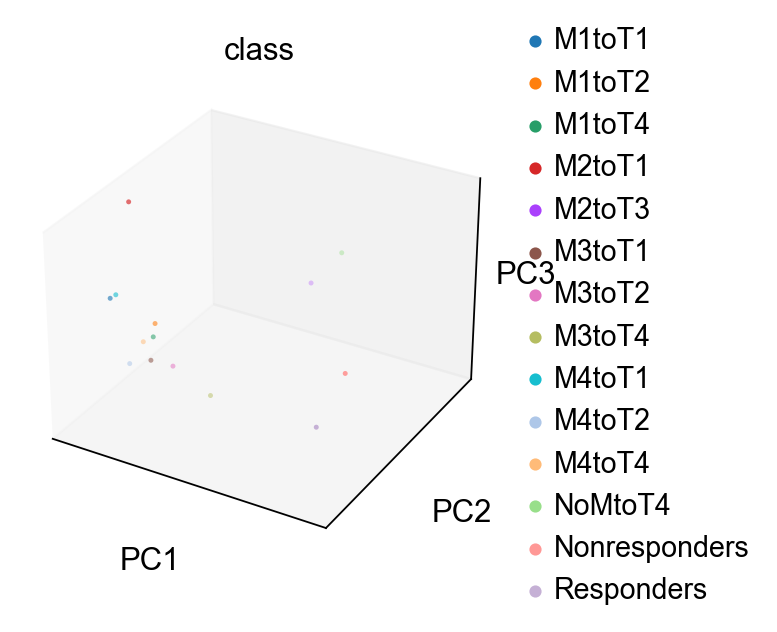

In [27]:
sc.pl.pca(padata_1, color=['class'], size=100000000, projection='3d')

In [31]:
sc.tl.pca(padata_1)

computing PCA
    with n_comps=13
    finished (0:00:00)


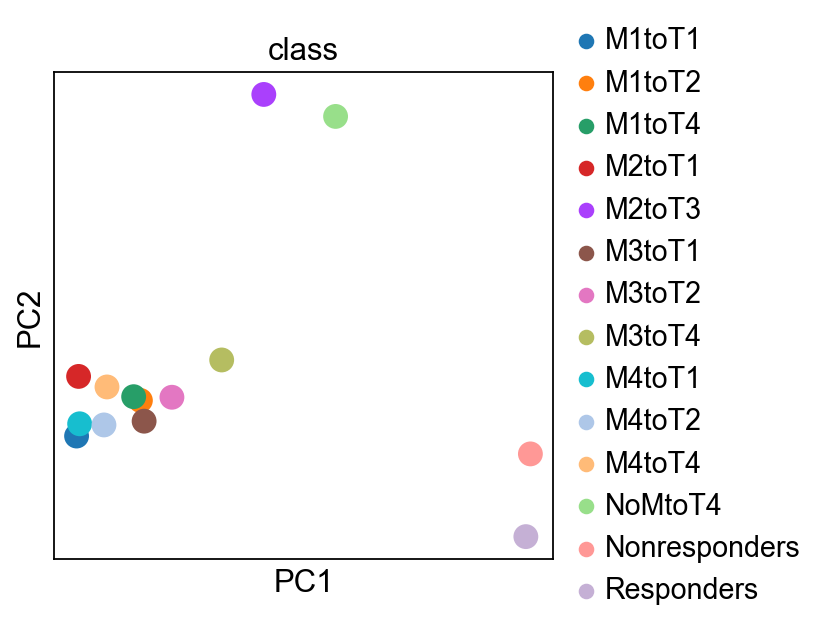

In [33]:
sc.pl.pca(padata_1, color='class', size=500, save='_pseudobulk_class.pdf')

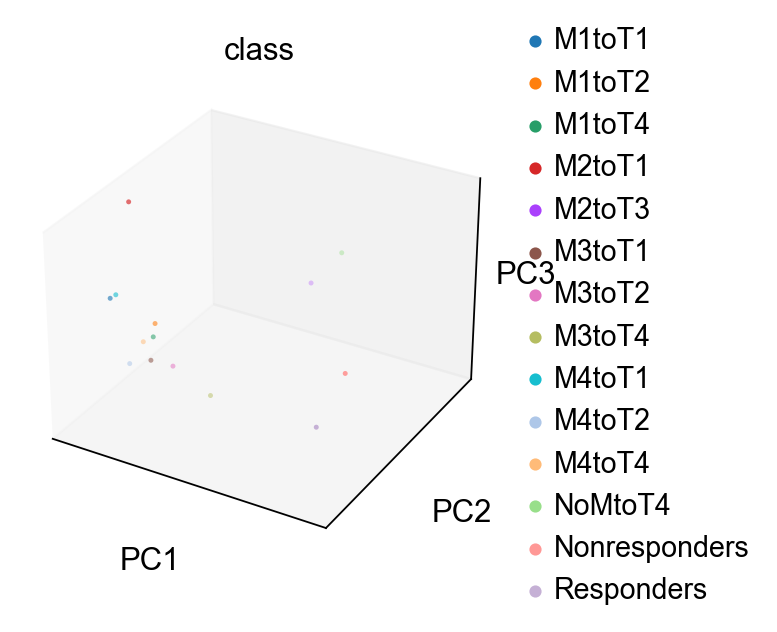

In [34]:
sc.pl.pca(padata_1, color='class', projection='3d', size=500, save='_pseudobulk_class_3d.pdf')

In [40]:
padata_1.obs

,tissue,batch,dataset,T_patient_cluster,T_patient_cluster4,Myeloid_patient_cluster4,class,response
M1toT1,tumor,0,Zhang dataset,NaN,T_1,Myeloid_1,M1toT1,NaN
M1toT2,tumor,0,Zhang dataset,NaN,T_2,Myeloid_1,M1toT2,NaN
M1toT4,tumor,0,Zhang dataset,NaN,T_4,Myeloid_1,M1toT4,NaN
M2toT1,tumor,0,Zhang dataset,NaN,T_1,Myeloid_2,M2toT1,NaN
M2toT3,tumor,0,Dinh dataset,NaN,T_3,Myeloid_2,M2toT3,NaN
M3toT1,tumor,0,Zhang dataset,NaN,T_1,Myeloid_3,M3toT1,NaN
M3toT2,tumor,0,Zhang dataset,NaN,T_2,Myeloid_3,M3toT2,NaN
M3toT4,tumor,0,Zhang dataset,NaN,T_4,Myeloid_3,M3toT4,NaN
M4toT1,tumor,0,Zhang dataset,NaN,T_1,Myeloid_4,M4toT1,NaN
M4toT2,tumor,0,Zhang dataset,NaN,T_2,Myeloid_4,M4toT2,NaN


In [78]:
padata_1.X

array([[0.75917375, 0.48910436, 0.3865457 , ..., 0.99080503, 0.37370166,
        0.54335994],
       [0.74755824, 0.6297383 , 0.3953868 , ..., 0.9268875 , 0.4496445 ,
        0.52919537],
       [0.66943944, 0.5516189 , 0.4484528 , ..., 0.7793061 , 0.4594315 ,
        0.481558  ],
       ...,
       [0.69617546, 0.6272816 , 0.64202756, ..., 0.68881786, 0.67028755,
        0.6095017 ],
       [0.8700893 , 0.8775387 , 0.41401595, ..., 0.75518477, 0.34351128,
        0.98863935],
       [0.8986471 , 0.890981  , 0.40210038, ..., 0.40801477, 0.26743206,
        0.55559856]], dtype=float32)

In [82]:
padata_69P_and_RNR = padata_1.to_df()
padata_69P_and_RNR

,AAAS,AAGAB,AAK1,AAMDC,AAMP,AAR2,AARS,AARS2,AASDH,AASDHPPT,...,ZSWIM7,ZSWIM8,ZSWIM9,ZW10,ZWILCH,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
M1toT1,0.759174,0.489104,0.386546,0.697343,0.432111,0.551145,0.757001,1.159701,0.806591,0.440139,...,0.580571,0.700900,1.077748,0.836538,0.740369,0.955957,0.694079,0.990805,0.373702,0.543360
M1toT2,0.747558,0.629738,0.395387,0.799283,0.469981,0.714585,0.660925,1.038714,0.801813,0.485622,...,0.561650,0.750453,1.111350,0.917930,0.824517,1.033672,0.629526,0.926888,0.449645,0.529195
M1toT4,0.669439,0.551619,0.448453,0.831801,0.445941,0.603122,0.747477,1.044910,0.825073,0.477237,...,0.577131,0.721080,1.169355,0.846268,0.876077,1.028852,0.650957,0.779306,0.459431,0.481558
M2toT1,0.719101,0.562228,0.443142,0.878956,0.399576,0.580166,0.502636,0.985232,0.886705,0.448206,...,0.537536,0.858791,1.041887,0.813391,0.835070,1.211983,0.711084,0.988412,0.407511,0.472859
M2toT3,0.709640,0.514225,0.565417,0.801578,0.560429,0.585400,0.496253,0.890522,0.999922,0.459812,...,0.621956,1.047747,1.304301,0.879616,1.018629,0.838233,0.526904,1.108028,0.354464,0.460474
M3toT1,0.695603,0.567297,0.490742,0.759590,0.458672,0.632668,0.628916,1.100517,0.766560,0.480994,...,0.577235,0.745036,1.197760,0.907200,0.819888,1.419825,0.768481,0.975708,0.414713,0.589577
M3toT2,0.707460,0.565875,0.442148,0.920709,0.498134,0.676344,0.647519,1.045409,0.852965,0.544775,...,0.595293,0.670500,1.175084,0.867724,0.895924,1.169061,0.716289,0.965002,0.449859,0.553648
M3toT4,0.784829,0.644765,0.451981,0.605996,0.547483,0.679445,0.664193,1.037910,0.773274,0.555163,...,0.623315,0.707150,1.222643,0.898133,1.012422,1.123795,0.633361,0.779918,0.558839,0.537094
M4toT1,0.548906,0.514427,0.480036,0.737775,0.423475,0.533298,0.578266,1.083333,0.707898,0.427086,...,0.580886,0.747335,1.116919,0.827102,0.824179,1.285231,0.813154,1.072106,0.343208,0.656941
M4toT2,0.716778,0.504394,0.370918,0.798350,0.440882,0.617305,0.599129,1.141927,0.873475,0.460639,...,0.528004,0.760009,1.170752,0.895577,0.799379,1.391788,0.716492,1.004574,0.348784,0.619892


In [85]:
padata_69P = padata_69P_and_RNR.drop(["Nonresponders","Responders"])
padata_69P

,AAAS,AAGAB,AAK1,AAMDC,AAMP,AAR2,AARS,AARS2,AASDH,AASDHPPT,...,ZSWIM7,ZSWIM8,ZSWIM9,ZW10,ZWILCH,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1
M1toT1,0.759174,0.489104,0.386546,0.697343,0.432111,0.551145,0.757001,1.159701,0.806591,0.440139,...,0.580571,0.700900,1.077748,0.836538,0.740369,0.955957,0.694079,0.990805,0.373702,0.543360
M1toT2,0.747558,0.629738,0.395387,0.799283,0.469981,0.714585,0.660925,1.038714,0.801813,0.485622,...,0.561650,0.750453,1.111350,0.917930,0.824517,1.033672,0.629526,0.926888,0.449645,0.529195
M1toT4,0.669439,0.551619,0.448453,0.831801,0.445941,0.603122,0.747477,1.044910,0.825073,0.477237,...,0.577131,0.721080,1.169355,0.846268,0.876077,1.028852,0.650957,0.779306,0.459431,0.481558
M2toT1,0.719101,0.562228,0.443142,0.878956,0.399576,0.580166,0.502636,0.985232,0.886705,0.448206,...,0.537536,0.858791,1.041887,0.813391,0.835070,1.211983,0.711084,0.988412,0.407511,0.472859
M2toT3,0.709640,0.514225,0.565417,0.801578,0.560429,0.585400,0.496253,0.890522,0.999922,0.459812,...,0.621956,1.047747,1.304301,0.879616,1.018629,0.838233,0.526904,1.108028,0.354464,0.460474
M3toT1,0.695603,0.567297,0.490742,0.759590,0.458672,0.632668,0.628916,1.100517,0.766560,0.480994,...,0.577235,0.745036,1.197760,0.907200,0.819888,1.419825,0.768481,0.975708,0.414713,0.589577
M3toT2,0.707460,0.565875,0.442148,0.920709,0.498134,0.676344,0.647519,1.045409,0.852965,0.544775,...,0.595293,0.670500,1.175084,0.867724,0.895924,1.169061,0.716289,0.965002,0.449859,0.553648
M3toT4,0.784829,0.644765,0.451981,0.605996,0.547483,0.679445,0.664193,1.037910,0.773274,0.555163,...,0.623315,0.707150,1.222643,0.898133,1.012422,1.123795,0.633361,0.779918,0.558839,0.537094
M4toT1,0.548906,0.514427,0.480036,0.737775,0.423475,0.533298,0.578266,1.083333,0.707898,0.427086,...,0.580886,0.747335,1.116919,0.827102,0.824179,1.285231,0.813154,1.072106,0.343208,0.656941
M4toT2,0.716778,0.504394,0.370918,0.798350,0.440882,0.617305,0.599129,1.141927,0.873475,0.460639,...,0.528004,0.760009,1.170752,0.895577,0.799379,1.391788,0.716492,1.004574,0.348784,0.619892


In [88]:
padata_69Pt = padata_69P.T
padata_69Pt

,M1toT1,M1toT2,M1toT4,M2toT1,M2toT3,M3toT1,M3toT2,M3toT4,M4toT1,M4toT2,M4toT4,NoMtoT4
AAAS,0.759174,0.747558,0.669439,0.719101,0.709640,0.695603,0.707460,0.784829,0.548906,0.716778,0.707842,0.696175
AAGAB,0.489104,0.629738,0.551619,0.562228,0.514225,0.567297,0.565875,0.644765,0.514427,0.504394,0.645794,0.627282
AAK1,0.386546,0.395387,0.448453,0.443142,0.565417,0.490742,0.442148,0.451981,0.480036,0.370918,0.427736,0.642028
AAMDC,0.697343,0.799283,0.831801,0.878956,0.801578,0.759590,0.920709,0.605996,0.737775,0.798350,0.514061,0.717120
AAMP,0.432111,0.469981,0.445941,0.399576,0.560429,0.458672,0.498134,0.547483,0.423475,0.440882,0.433951,0.650646
...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDB,0.955957,1.033672,1.028852,1.211983,0.838233,1.419825,1.169061,1.123795,1.285231,1.391788,1.293109,0.714365
ZXDC,0.694079,0.629526,0.650957,0.711084,0.526904,0.768481,0.716289,0.633361,0.813154,0.716492,0.836547,0.594610
ZYG11B,0.990805,0.926888,0.779306,0.988412,1.108028,0.975708,0.965002,0.779918,1.072106,1.004574,0.776793,0.688818
ZYX,0.373702,0.449645,0.459431,0.407511,0.354464,0.414713,0.449859,0.558839,0.343208,0.348784,0.472091,0.670288


In [89]:
padata_69Pt.to_csv('pseudobulk_of_69P_TME.csv')

# pseudobulk with TME and Responders

In [47]:
# Get pseudo-bulk profile
padata_1R = dc.get_pseudobulk(adata_1[adata_1.obs['class'].isin(['M1toT1','M1toT2','M1toT4','M2toT1','M2toT3',
                                                'M3toT1','M3toT2','M3toT4','M4toT1','M4toT2','M4toT4','NoMtoT4',
                                               'Responders'])], sample_col='class',groups_col='class', layer='counts', min_prop=0.2, min_smpls=3)
padata_1R

View of AnnData object with n_obs × n_vars = 13 × 9893
    obs: 'tissue', 'batch', 'dataset', 'T_patient_cluster', 'T_patient_cluster4', 'Myeloid_patient_cluster4', 'class', 'response'

In [48]:
padata_1R.obs

,tissue,batch,dataset,T_patient_cluster,T_patient_cluster4,Myeloid_patient_cluster4,class,response
M1toT1,tumor,0,Zhang dataset,NaN,T_1,Myeloid_1,M1toT1,NaN
M1toT2,tumor,0,Zhang dataset,NaN,T_2,Myeloid_1,M1toT2,NaN
M1toT4,tumor,0,Zhang dataset,NaN,T_4,Myeloid_1,M1toT4,NaN
M2toT1,tumor,0,Zhang dataset,NaN,T_1,Myeloid_2,M2toT1,NaN
M2toT3,tumor,0,Dinh dataset,NaN,T_3,Myeloid_2,M2toT3,NaN
M3toT1,tumor,0,Zhang dataset,NaN,T_1,Myeloid_3,M3toT1,NaN
M3toT2,tumor,0,Zhang dataset,NaN,T_2,Myeloid_3,M3toT2,NaN
M3toT4,tumor,0,Zhang dataset,NaN,T_4,Myeloid_3,M3toT4,NaN
M4toT1,tumor,0,Zhang dataset,NaN,T_1,Myeloid_4,M4toT1,NaN
M4toT2,tumor,0,Zhang dataset,NaN,T_2,Myeloid_4,M4toT2,NaN


In [49]:
# Normalize
sc.pp.normalize_total(padata_1R, target_sum=1e4)
sc.pp.log1p(padata_1R)
padata_1R

normalizing counts per cell
    finished ({time_passed})


AnnData object with n_obs × n_vars = 13 × 9893
    obs: 'tissue', 'batch', 'dataset', 'T_patient_cluster', 'T_patient_cluster4', 'Myeloid_patient_cluster4', 'class', 'response'
    uns: 'log1p'

In [50]:
padata_1R.obs['class'] = padata_1R.obs['class'].astype('category')

In [51]:
padata_1R.obs['class']

M1toT1            M1toT1
M1toT2            M1toT2
M1toT4            M1toT4
M2toT1            M2toT1
M2toT3            M2toT3
M3toT1            M3toT1
M3toT2            M3toT2
M3toT4            M3toT4
M4toT1            M4toT1
M4toT2            M4toT2
M4toT4            M4toT4
NoMtoT4          NoMtoT4
Responders    Responders
Name: class, dtype: category
Categories (13, object): ['M1toT1', 'M1toT2', 'M1toT4', 'M2toT1', ..., 'M4toT2', 'M4toT4', 'NoMtoT4', 'Responders']

In [52]:
sc.tl.pca(padata_1R)

computing PCA
    with n_comps=12
    finished (0:00:00)


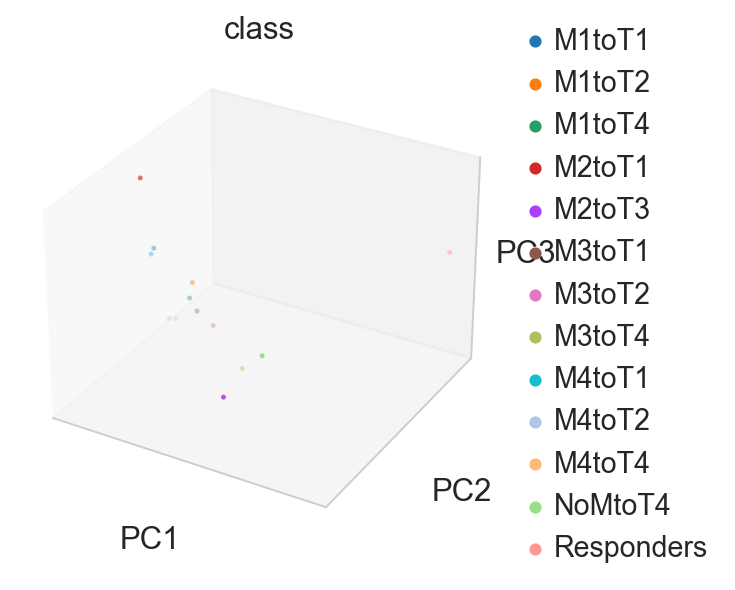

In [77]:
sc.pl.pca(padata_1R, color=['class'], size=100000000, projection='3d', save='_3d_PCA_all_TME_and_Responders_pseudobulk.pdf')

In [57]:
# dendrogram after converting mouse gene to human gene
sc.tl.dendrogram(padata_1R, 'class')

    using 'X_pca' with n_pcs = 12
Storing dendrogram info using `.uns['dendrogram_class']`


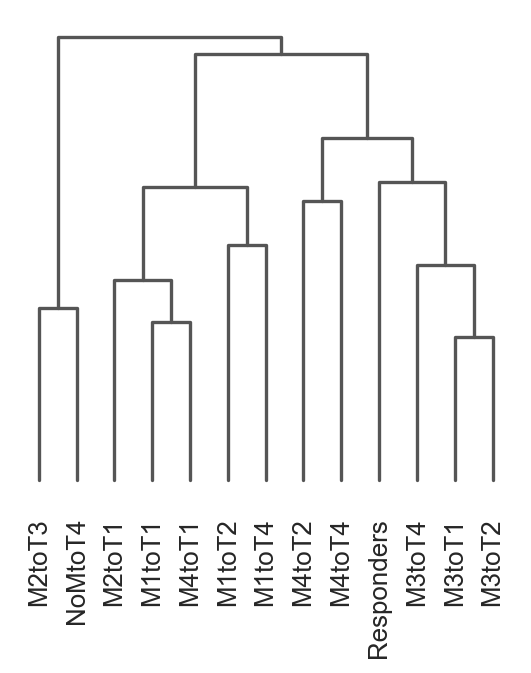

<Axes: >

In [76]:
sc.pl.dendrogram(padata_1R, 'class', save='_dendrogram_all_TME_and_Responders_pseudobulk.pdf')

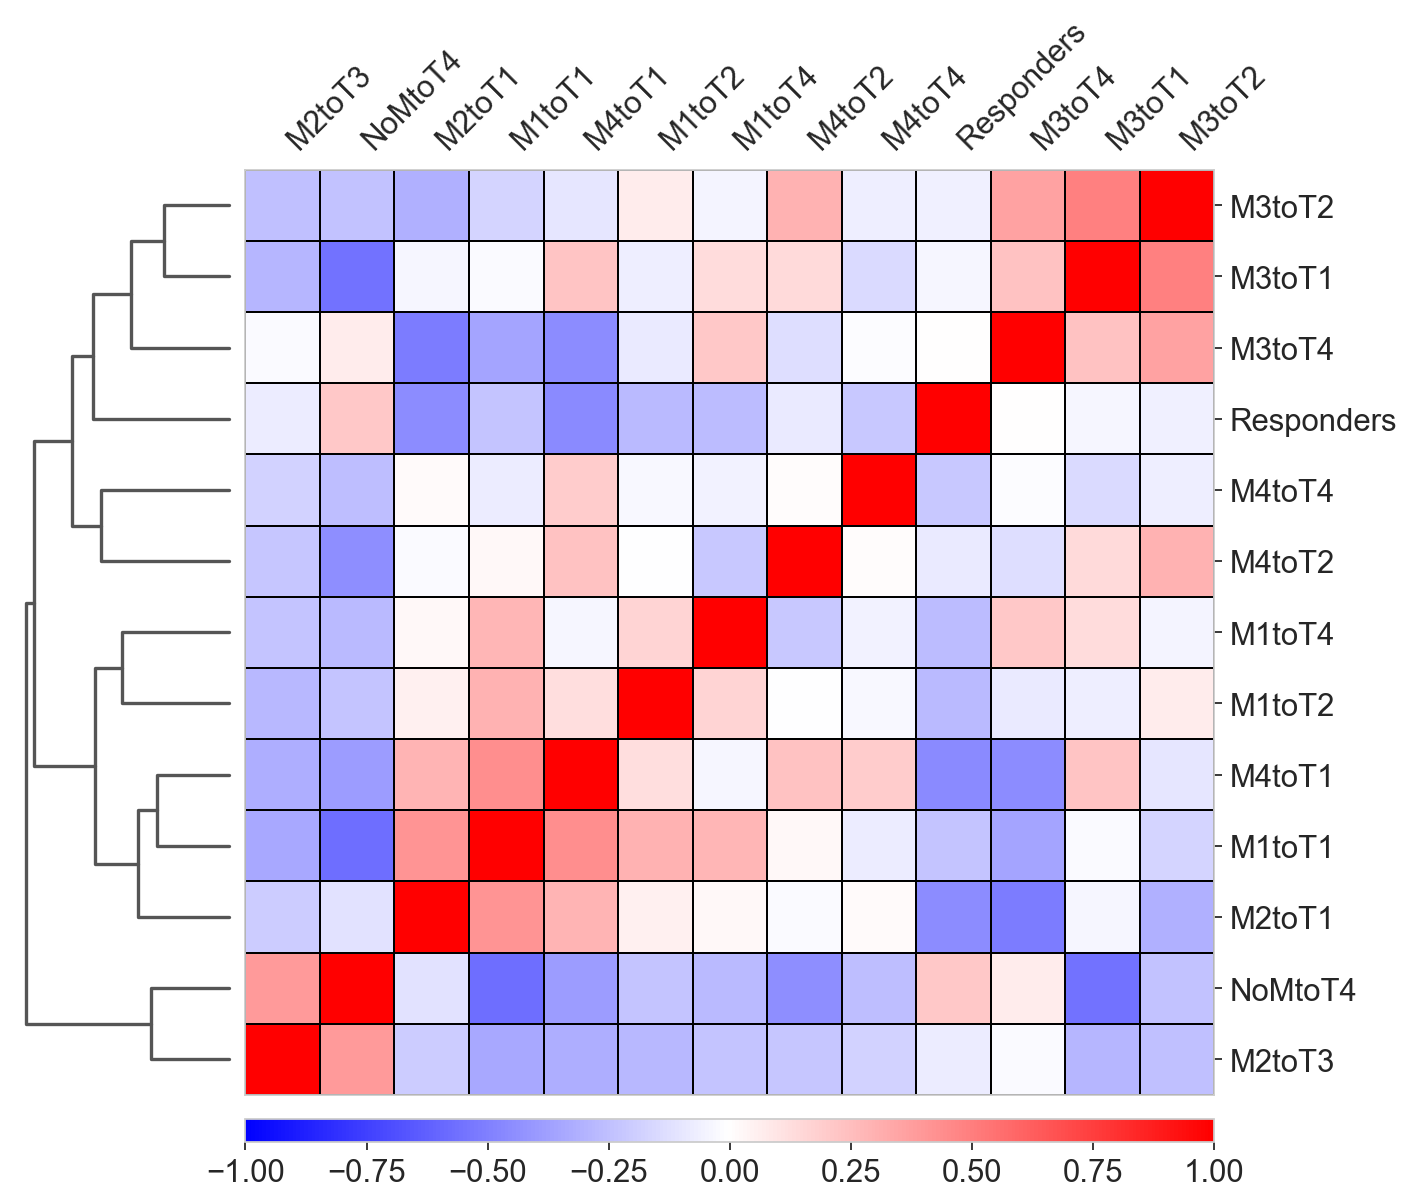

In [60]:
sc.pl.correlation_matrix(padata_1R, groupby='class')

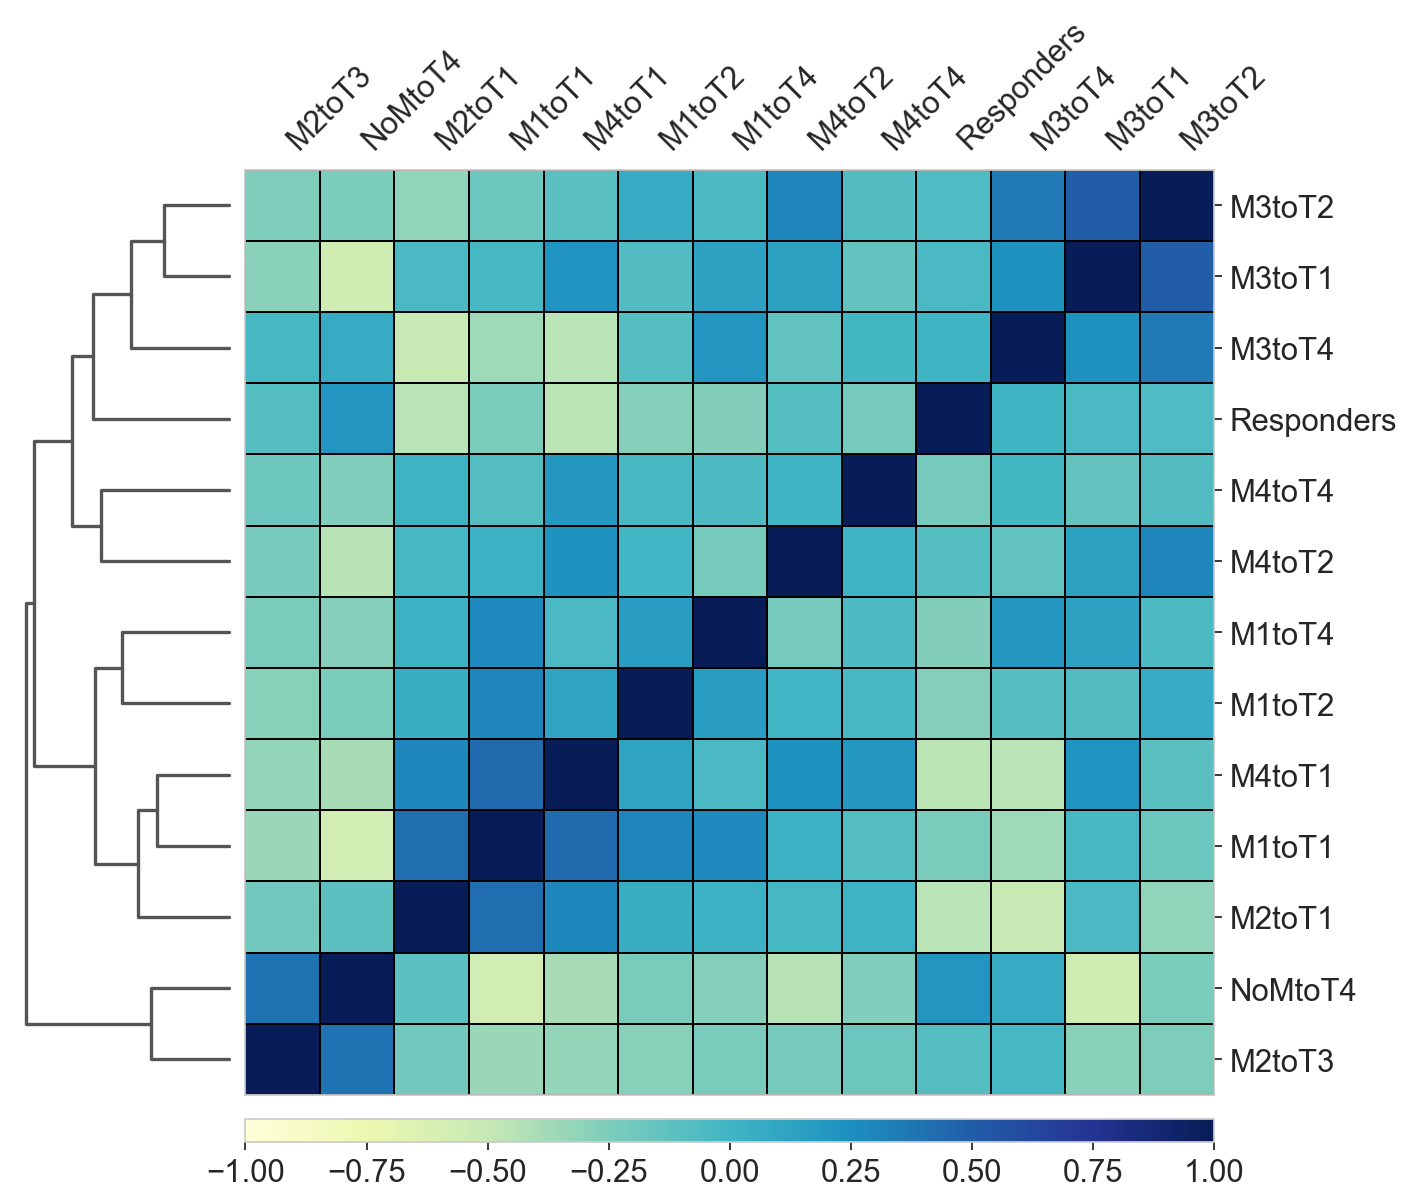

In [59]:
sc.pl.correlation_matrix(padata_1R, groupby='class',cmap='YlGnBu')

# pseudobulk with TME and Non-Responders

In [61]:
# Get pseudo-bulk profile
padata_1NR = dc.get_pseudobulk(adata_1[adata_1.obs['class'].isin(['M1toT1','M1toT2','M1toT4','M2toT1','M2toT3',
                                                'M3toT1','M3toT2','M3toT4','M4toT1','M4toT2','M4toT4','NoMtoT4',
                                               'Nonresponders'])], sample_col='class',groups_col='class', layer='counts', min_prop=0.2, min_smpls=3)
padata_1NR

View of AnnData object with n_obs × n_vars = 13 × 9893
    obs: 'tissue', 'batch', 'dataset', 'T_patient_cluster', 'T_patient_cluster4', 'Myeloid_patient_cluster4', 'class', 'response'

In [62]:
padata_1NR.obs

,tissue,batch,dataset,T_patient_cluster,T_patient_cluster4,Myeloid_patient_cluster4,class,response
M1toT1,tumor,0,Zhang dataset,NaN,T_1,Myeloid_1,M1toT1,NaN
M1toT2,tumor,0,Zhang dataset,NaN,T_2,Myeloid_1,M1toT2,NaN
M1toT4,tumor,0,Zhang dataset,NaN,T_4,Myeloid_1,M1toT4,NaN
M2toT1,tumor,0,Zhang dataset,NaN,T_1,Myeloid_2,M2toT1,NaN
M2toT3,tumor,0,Dinh dataset,NaN,T_3,Myeloid_2,M2toT3,NaN
M3toT1,tumor,0,Zhang dataset,NaN,T_1,Myeloid_3,M3toT1,NaN
M3toT2,tumor,0,Zhang dataset,NaN,T_2,Myeloid_3,M3toT2,NaN
M3toT4,tumor,0,Zhang dataset,NaN,T_4,Myeloid_3,M3toT4,NaN
M4toT1,tumor,0,Zhang dataset,NaN,T_1,Myeloid_4,M4toT1,NaN
M4toT2,tumor,0,Zhang dataset,NaN,T_2,Myeloid_4,M4toT2,NaN


In [63]:
# Normalize
sc.pp.normalize_total(padata_1NR, target_sum=1e4)
sc.pp.log1p(padata_1NR)
padata_1NR

normalizing counts per cell
    finished (0:00:00)


AnnData object with n_obs × n_vars = 13 × 9893
    obs: 'tissue', 'batch', 'dataset', 'T_patient_cluster', 'T_patient_cluster4', 'Myeloid_patient_cluster4', 'class', 'response'
    uns: 'log1p'

In [64]:
padata_1NR.obs['class'] = padata_1NR.obs['class'].astype('category')

In [65]:
padata_1NR.obs['class']

M1toT1                  M1toT1
M1toT2                  M1toT2
M1toT4                  M1toT4
M2toT1                  M2toT1
M2toT3                  M2toT3
M3toT1                  M3toT1
M3toT2                  M3toT2
M3toT4                  M3toT4
M4toT1                  M4toT1
M4toT2                  M4toT2
M4toT4                  M4toT4
NoMtoT4                NoMtoT4
Nonresponders    Nonresponders
Name: class, dtype: category
Categories (13, object): ['M1toT1', 'M1toT2', 'M1toT4', 'M2toT1', ..., 'M4toT2', 'M4toT4', 'NoMtoT4', 'Nonresponders']

In [66]:
sc.tl.pca(padata_1NR)

computing PCA
    with n_comps=12
    finished (0:00:00)


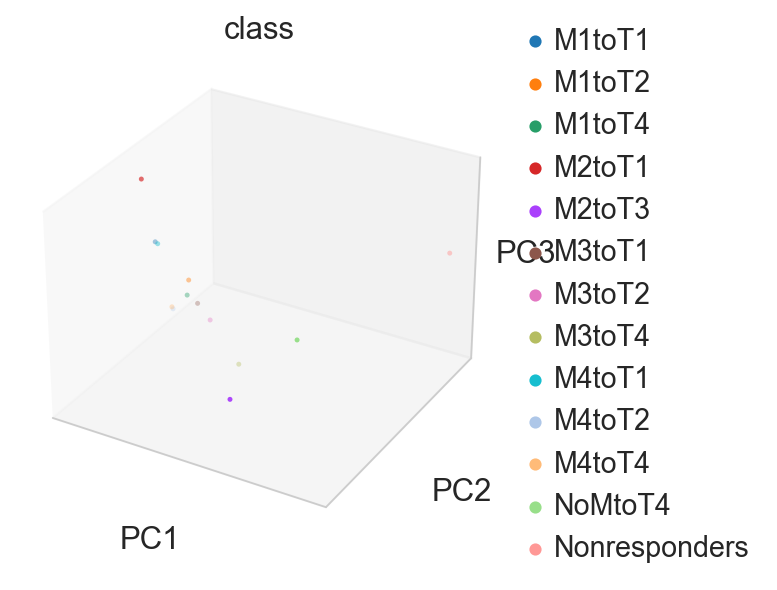

In [75]:
sc.pl.pca(padata_1NR, color=['class'], size=100000000, projection='3d', save='_3d_PCA_all_TME_and_Nonresponders_pseudobulk.pdf')

In [69]:
# dendrogram after converting mouse gene to human gene
sc.tl.dendrogram(padata_1NR, 'class')

    using 'X_pca' with n_pcs = 12
Storing dendrogram info using `.uns['dendrogram_class']`


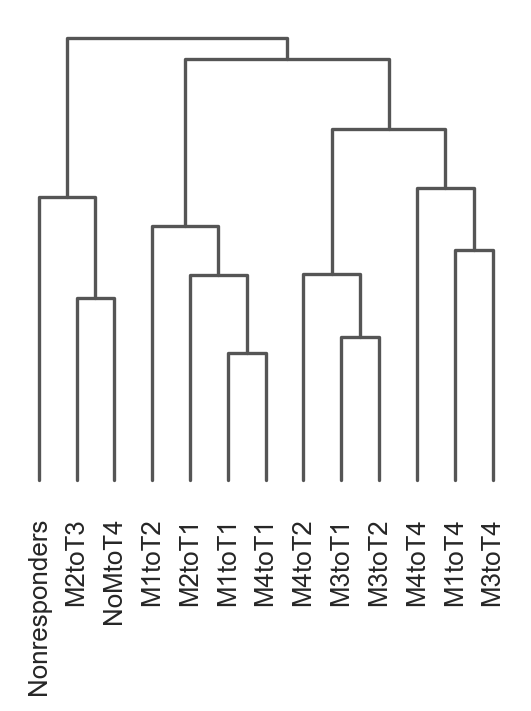

<Axes: >

In [74]:
sc.pl.dendrogram(padata_1NR, 'class', save='_dendrogram_all_TME_and_Nonresponders_pseudobulk.pdf')

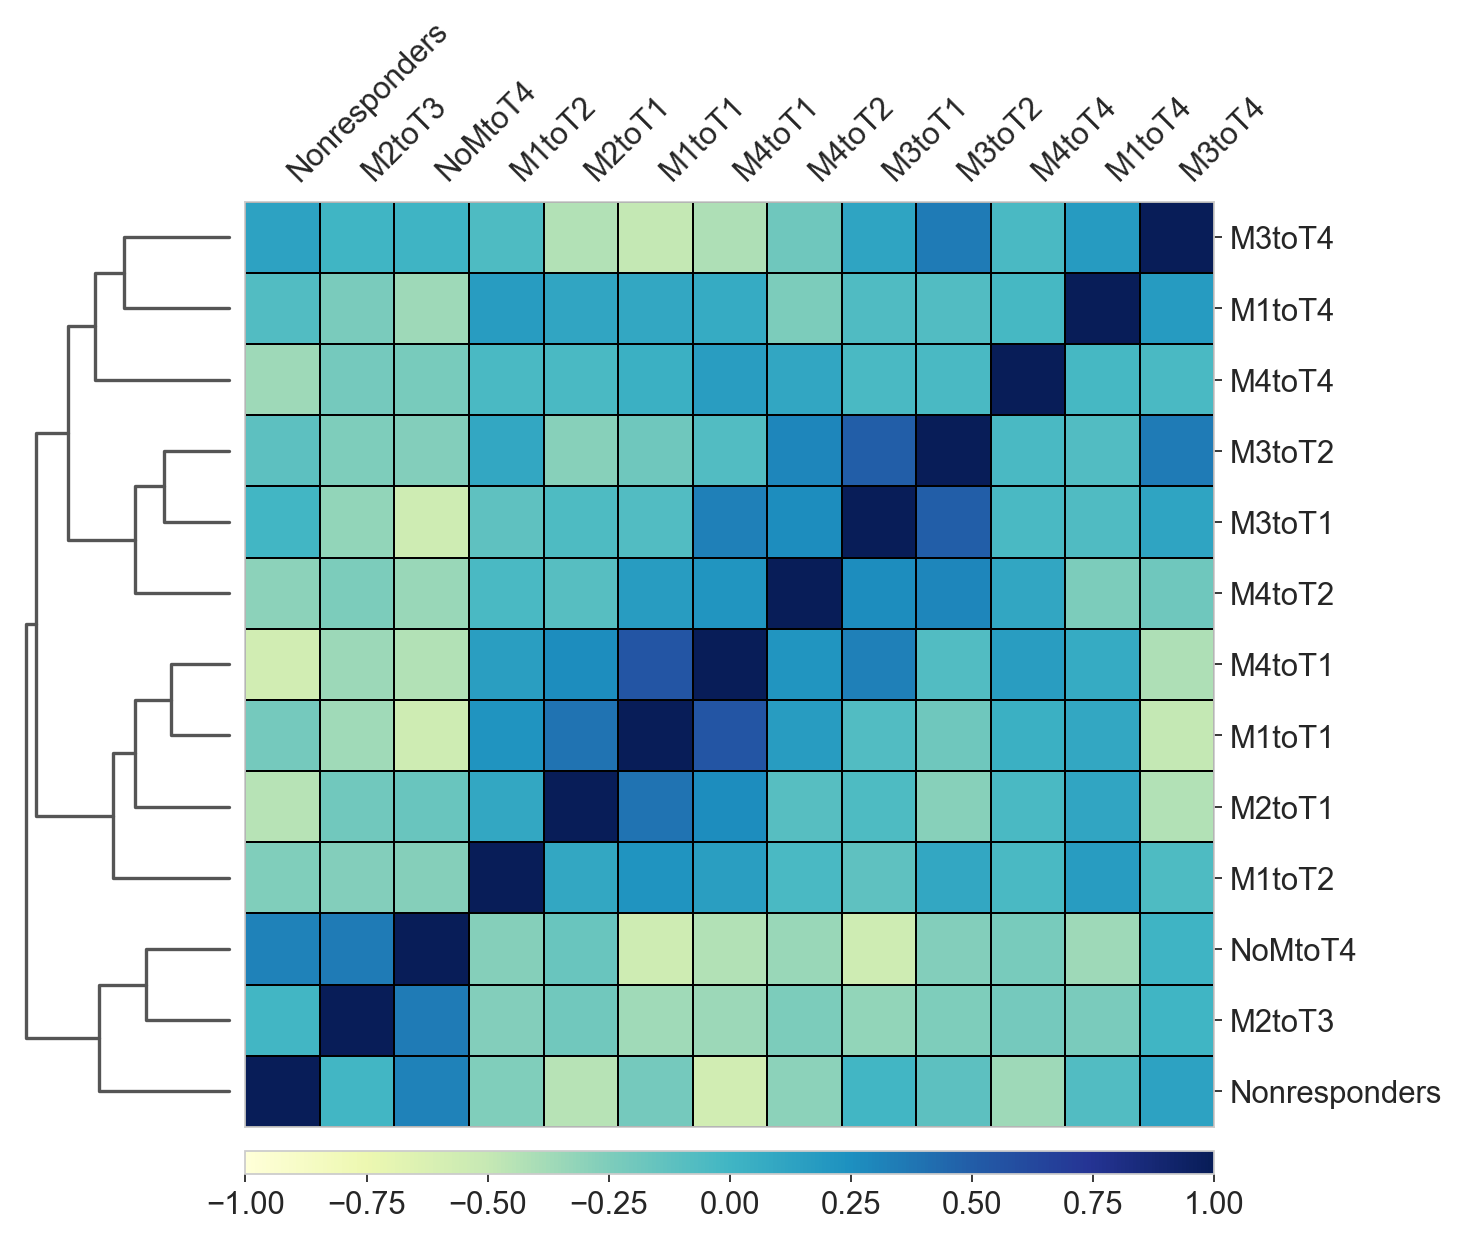

In [71]:
sc.pl.correlation_matrix(padata_1NR, groupby='class',cmap='YlGnBu')

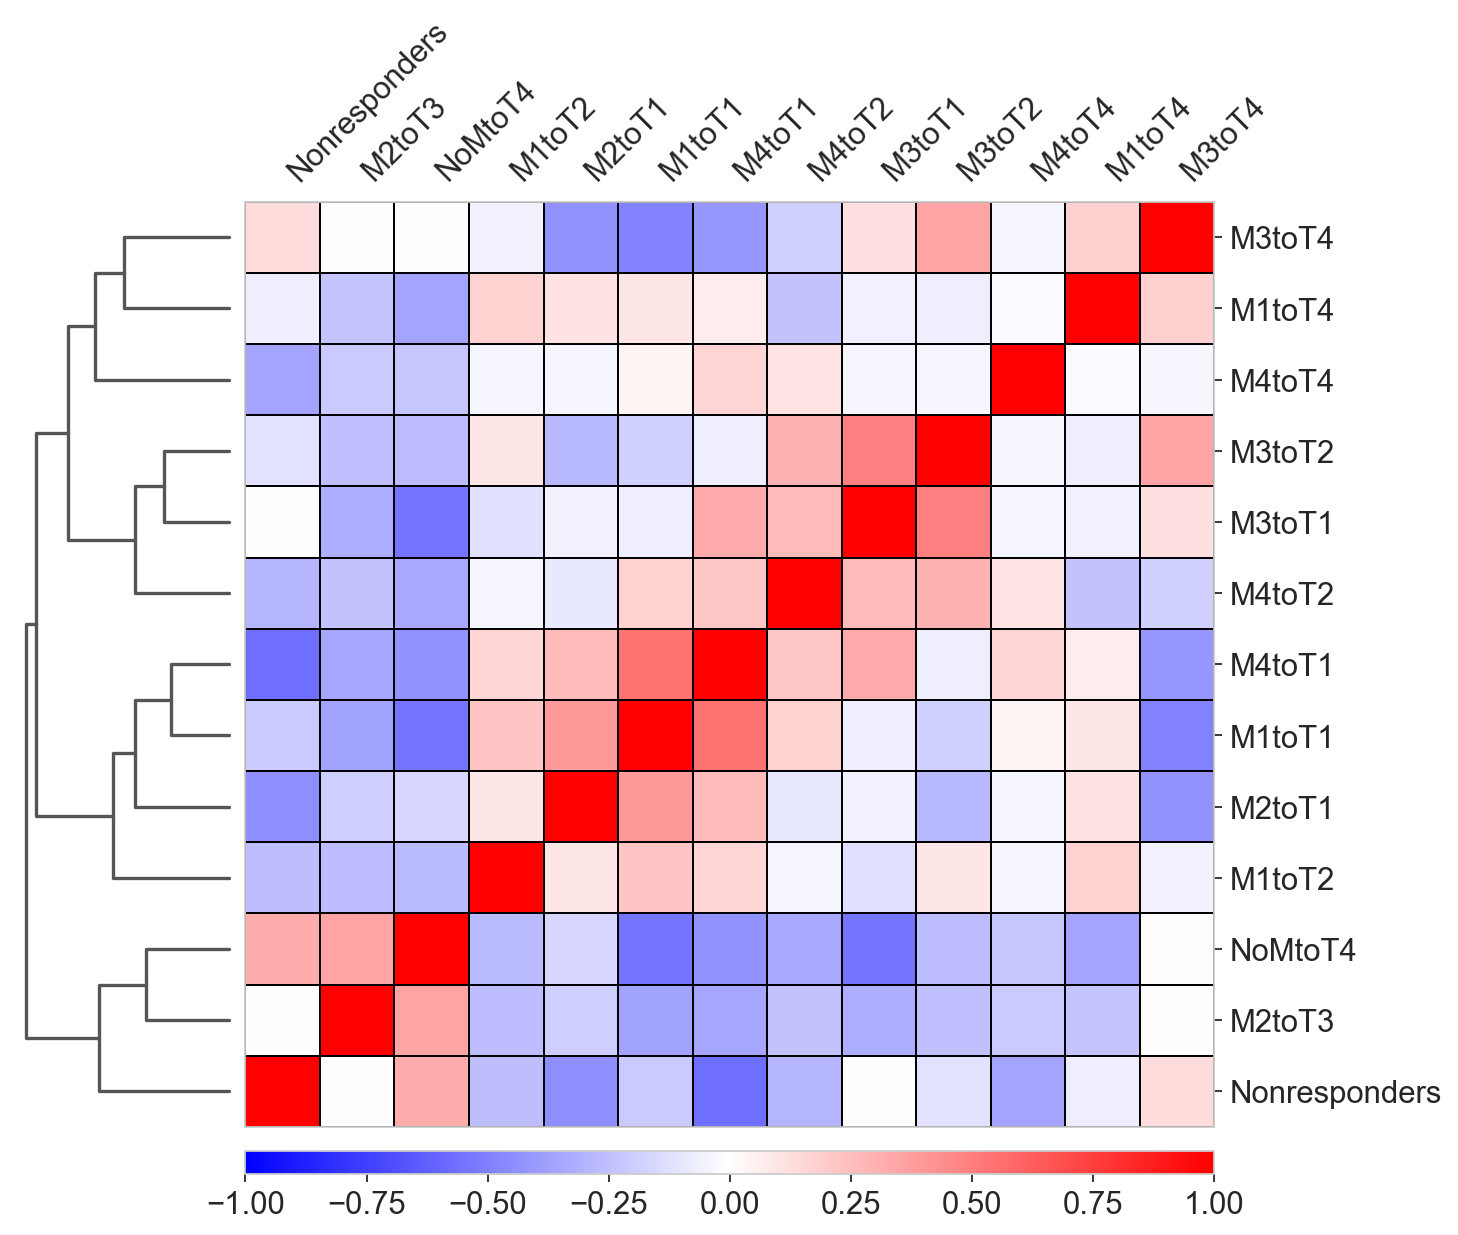

In [72]:
sc.pl.correlation_matrix(padata_1NR, groupby='class')